Im ersten Notebook wurde die Daten/Struktur angeschaut, nun sollen die Daten zusammengeführt werden für ein ganzes Jahr.
Schritte: pro Monat die Datentabellen zusammenführen, dann alle Monate.
Für die pro Jahr Analyse auch Monatsintervalle beachten.


In [1]:
# imports für das notebook
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
import datetime as dt
import math
# importing re for regular expressions
import re
import os

import analysis_functions

## citibikenyc per year

### monthly intervalls


In [2]:
year = 2024
result_map, stations_analysis_list = analysis_functions.analysis_one_year(year, 'intermediate_results/df_geocode_all_stations.csv', 'normal')

normal all region analysis performed
month: 01
202401-citibike-tripdata.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


[                  ride_id  rideable_type               started_at  \
0        5078F3D302000BD2  electric_bike  2024-01-22 18:43:19.012   
1        814337105D37302A  electric_bike  2024-01-11 19:19:18.721   
2        A33A920E2B10710C  electric_bike  2024-01-30 19:17:41.693   
3        A3A5FC0DD7D34D74  electric_bike  2024-01-27 11:27:01.759   
4        6F96728ECEFBDAA4  electric_bike  2024-01-16 15:15:41.000   
...                   ...            ...                      ...   
1888080  A000BAF8F05029A8   classic_bike  2024-01-29 07:40:32.831   
1888081  C77BE3036B21E968  electric_bike  2024-01-29 11:56:47.527   
1888082  237086E0CB225F12   classic_bike  2024-01-12 16:51:37.231   
1888083  AE07BD9F78098E07   classic_bike  2024-01-26 09:32:45.932   
1888084  6CA3DBF7480682C2  electric_bike  2024-01-29 17:29:55.879   

                        ended_at                  start_station_name  \
0        2024-01-22 18:48:10.708  Frederick Douglass Blvd & W 145 St   
1        2024-01-11 19:47:

C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


[                  ride_id  rideable_type               started_at  \
0        B2B980E0EAE1D6F1   classic_bike  2024-02-25 20:25:40.894   
1        1069DDA1FED20568   classic_bike  2024-02-21 22:21:38.446   
2        B58850AF6F2D8BD5  electric_bike  2024-02-14 08:31:14.609   
3        D46E6C5A69048E11  electric_bike  2024-02-05 08:42:25.999   
4        707AF4CF2C7834C2  electric_bike  2024-02-08 11:13:15.969   
...                   ...            ...                      ...   
2121496  470C026528BACA6F  electric_bike  2024-02-08 19:55:20.590   
2121497  C3A69B86250DC97F   classic_bike  2024-02-24 09:37:13.343   
2121498  07B1E55B22909E1D  electric_bike  2024-02-12 18:07:55.640   
2121499  BFDBE8CC2EF9E678  electric_bike  2024-02-22 09:12:00.967   
2121500  FD3C194DDA6BEF94  electric_bike  2024-02-28 17:32:58.667   

                        ended_at        start_station_name start_station_id  \
0        2024-02-25 20:43:58.504  Greenwich St & Hubert St          5470.10   
1        202

C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


[                  ride_id  rideable_type               started_at  \
0        62021B31AF42943E  electric_bike  2024-03-13 15:57:41.800   
1        EC7BE9D296FFD072  electric_bike  2024-03-16 10:25:46.114   
2        EC85C0EEC95157BB   classic_bike  2024-03-20 19:20:49.818   
3        9DDE9AF5606B4E0F   classic_bike  2024-03-13 20:31:12.599   
4        E4446F457328C5FE  electric_bike  2024-03-16 10:50:11.535   
...                   ...            ...                      ...   
2663290  D294FEC7F31CBA54  electric_bike  2024-03-15 11:44:14.141   
2663291  F96260F790F4EC76  electric_bike  2024-03-18 16:50:23.185   
2663292  92D52DD10562A799  electric_bike  2024-03-20 11:35:21.922   
2663293  CEA7A7CA104EDB3A  electric_bike  2024-03-15 09:29:16.009   
2663294  BB74320171FA7163   classic_bike  2024-03-18 14:51:20.408   

                        ended_at        start_station_name start_station_id  \
0        2024-03-13 16:07:09.853     Forsyth St & Grand St          5382.07   
1        202

C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


[                  ride_id  rideable_type               started_at  \
0        F561526822C9D60B  electric_bike  2024-04-27 13:56:13.940   
1        359BAF91507F4998  electric_bike  2024-04-25 15:23:14.529   
2        AAEE95A1C0106C97  electric_bike  2024-04-06 11:15:18.132   
3        95B077C9C619D404  electric_bike  2024-04-06 16:19:25.749   
4        1A33C864454C4692  electric_bike  2024-04-10 17:40:14.700   
...                   ...            ...                      ...   
3217058  BE0F887BE16DFDDA  electric_bike  2024-04-16 07:47:35.966   
3217059  850F33001EDD1AE4   classic_bike  2024-04-10 08:45:16.500   
3217060  CEE1CDE84344E8FF  electric_bike  2024-04-09 17:44:45.398   
3217061  174E104B28274EE1   classic_bike  2024-04-03 14:42:57.301   
3217062  F17B1138A0D1497F   classic_bike  2024-04-25 11:38:01.936   

                        ended_at             start_station_name  \
0        2024-04-27 14:05:23.629            FDR Drive & E 35 St   
1        2024-04-25 15:27:52.895    

C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202405-citibike-tripdata_2.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202405-citibike-tripdata_3.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202405-citibike-tripdata_4.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202405-citibike-tripdata_5.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


[                 ride_id  rideable_type           started_at  \
0       FE6A074FC945A086  electric_bike  2024-05-01 08:05:53   
1       6844CF42F72827D7   classic_bike  2024-05-10 15:00:06   
2       D7C9E007F791A7A2   classic_bike  2024-05-06 12:28:39   
3       3419650E2F5999F1   classic_bike  2024-05-16 16:09:14   
4       5469FDC75E0F1FCA  electric_bike  2024-05-29 15:43:37   
...                  ...            ...                  ...   
999995  262489FCDAEA9A4D  electric_bike  2024-05-12 18:44:44   
999996  DA2615F1E0B456CA  electric_bike  2024-05-11 07:45:19   
999997  69B45F1E5EFDA6CE  electric_bike  2024-05-04 11:21:56   
999998  CD2C41A9E343EA25  electric_bike  2024-05-01 18:07:57   
999999  6B19869EA948F4C3  electric_bike  2024-05-16 12:24:02   

                   ended_at          start_station_name start_station_id  \
0       2024-05-01 08:15:14             1 Ave & E 30 St          6079.03   
1       2024-05-10 15:08:58              31 Ave & 57 St          6621.06   
2 

C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202406-citibike-tripdata_2.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202406-citibike-tripdata_3.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202406-citibike-tripdata_4.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202406-citibike-tripdata_5.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


[                 ride_id  rideable_type               started_at  \
0       A38B171B6C31691A  electric_bike  2024-06-12 17:47:23.952   
1       77E13C9D6559EA56  electric_bike  2024-06-04 16:48:42.876   
2       EA6418AD826D19D9  electric_bike  2024-06-01 13:36:28.502   
3       121CF2548FB65A29   classic_bike  2024-06-01 03:12:09.636   
4       E6BE7FD2809649D6  electric_bike  2024-06-08 13:14:31.197   
...                  ...            ...                      ...   
999995  FA32293146DB0F75  electric_bike  2024-06-11 18:44:53.460   
999996  7FE88C2FF7C428FB  electric_bike  2024-06-03 12:28:30.970   
999997  2BC0191D8D596C7E  electric_bike  2024-06-02 14:45:16.728   
999998  6901EBC452881D3E  electric_bike  2024-06-13 13:53:43.523   
999999  C8BFD2FB5A7551C7  electric_bike  2024-06-04 15:55:44.618   

                       ended_at           start_station_name start_station_id  \
0       2024-06-12 17:50:27.312              E 89 St & 3 Ave          7265.10   
1       2024-06-04 1

C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202407-citibike-tripdata_2.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202407-citibike-tripdata_3.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202407-citibike-tripdata_4.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202407-citibike-tripdata_5.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


[        Unnamed: 0           ride_id  rideable_type               started_at  \
0                0  A3818B07E831C033  electric_bike  2024-07-01 21:00:55.640   
1                1  40B46D3F898A6CA4  electric_bike  2024-07-09 18:28:39.551   
2                2  33683B345D08C2BC  electric_bike  2024-07-14 17:10:28.899   
3                3  B213C077CE572EBD  electric_bike  2024-07-01 11:37:06.440   
4                4  E42FF50D966A009B  electric_bike  2024-07-05 16:55:59.093   
...            ...               ...            ...                      ...   
999995      999995  DE55B958B8F7B169  electric_bike  2024-07-03 08:52:58.314   
999996      999996  750EA117528B4AAB  electric_bike  2024-07-08 20:06:23.197   
999997      999997  E8B9FBC599A2E5A9   classic_bike  2024-07-09 17:46:31.953   
999998      999998  4DA46B05C45F35B4   classic_bike  2024-07-03 06:50:47.228   
999999      999999  0515F1A0EB8587D0  electric_bike  2024-07-05 21:49:34.032   

                       ended_at       

C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202408-citibike-tripdata_2.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202408-citibike-tripdata_3.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202408-citibike-tripdata_4.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202408-citibike-tripdata_5.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


[       rideable_type_duplicate_column_name_1           ride_id  rideable_type  \
0                              electric_bike  06967465A2A0ABD9  electric_bike   
1                              electric_bike  8698B37420563CCC  electric_bike   
2                              electric_bike  E7CB10418EBA1F43  electric_bike   
3                              electric_bike  25C23D06829C695C  electric_bike   
4                               classic_bike  D11FB08CCDC5E48F   classic_bike   
...                                      ...               ...            ...   
999995                          classic_bike  B3BA97F5F5276261   classic_bike   
999996                          classic_bike  4B4A4A0FE772E23D   classic_bike   
999997                         electric_bike  6B3E44DFBE527F00  electric_bike   
999998                          classic_bike  45F90DD5F7FBC7DA   classic_bike   
999999                          classic_bike  07EC9CD0CF12DD62   classic_bike   

                     start

C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202409-citibike-tripdata_2.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202409-citibike-tripdata_3.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202409-citibike-tripdata_4.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202409-citibike-tripdata_5.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


[                 ride_id  rideable_type               started_at  \
0       D86F678648E7A867  electric_bike  2024-09-10 22:50:16.212   
1       032D1788CD512084  electric_bike  2024-09-22 05:51:00.609   
2       DA55381E5121F0F9  electric_bike  2024-09-24 11:07:40.618   
3       F67A042C028C6367   classic_bike  2024-09-03 14:25:28.732   
4       31F722D5EAB9C780  electric_bike  2024-09-09 15:46:50.376   
...                  ...            ...                      ...   
999995  7A5F1A4BE0C55E41  electric_bike  2024-09-17 16:35:49.434   
999996  799774DCAAC34209  electric_bike  2024-09-14 11:18:38.355   
999997  F1D7D0EE6011A64F  electric_bike  2024-09-16 17:32:02.654   
999998  47C499E157DCBAD5  electric_bike  2024-09-01 16:35:11.171   
999999  DC7E3DA0BBB38BD5   classic_bike  2024-09-01 00:02:04.914   

                       ended_at        start_station_name start_station_id  \
0       2024-09-10 23:30:44.697       Hudson St & W 13 St          6115.06   
1       2024-09-22 05:56:5

C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202410-citibike-tripdata_2.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202410-citibike-tripdata_3.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202410-citibike-tripdata_4.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202410-citibike-tripdata_5.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202410-citibike-tripdata_6.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


[                 ride_id  rideable_type               started_at  \
0       B4544C93905FA10E  electric_bike  2024-10-13 17:38:36.748   
1       435860FFE89FC278  electric_bike  2024-10-06 00:58:33.042   
2       4EB0709C97181E8A  electric_bike  2024-10-11 21:15:40.455   
3       930590FEA1806C34  electric_bike  2024-10-14 19:08:12.154   
4       EA33E5FD386A60F4  electric_bike  2024-10-13 01:19:20.877   
...                  ...            ...                      ...   
999995  F60D8345DF7DA010  electric_bike  2024-10-08 07:07:37.902   
999996  A7B575626177E70D  electric_bike  2024-10-12 12:42:05.626   
999997  F146E98E4C5C3927  electric_bike  2024-10-04 07:34:13.461   
999998  08E47660A572FDE7  electric_bike  2024-10-01 07:04:32.165   
999999  9F457344CDC10B2F  electric_bike  2024-10-03 07:25:09.077   

                       ended_at           start_station_name start_station_id  \
0       2024-10-13 17:45:22.657        Rutgers St & Henry St          5230.02   
1       2024-10-06 0

C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202411-citibike-tripdata_2.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202411-citibike-tripdata_3.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202411-citibike-tripdata_4.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


[                 ride_id  rideable_type               started_at  \
0       E5B8C4DFACE42813  electric_bike  2024-11-09 12:34:17.909   
1       66AE1D7C81DAA911  electric_bike  2024-11-25 21:07:32.005   
2       43A39BF410C2F694  electric_bike  2024-11-16 01:13:03.167   
3       51823416B564CD94  electric_bike  2024-11-24 00:20:20.762   
4       BCC7B6CA4241A466  electric_bike  2024-11-14 09:24:15.552   
...                  ...            ...                      ...   
999995  76C3588B70D842A5  electric_bike  2024-11-13 14:41:41.028   
999996  33D3848AB1493B16  electric_bike  2024-11-14 17:18:49.656   
999997  2838A8968EA013B3  electric_bike  2024-11-10 14:31:48.437   
999998  19B161F2094D10E5  electric_bike  2024-11-08 17:51:56.783   
999999  FCAA3EA035CE855E   classic_bike  2024-11-06 17:07:34.212   

                       ended_at       start_station_name start_station_id  \
0       2024-11-09 12:47:41.956           E 4 St & Ave B          5515.08   
1       2024-11-25 21:20:34.

C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202412-citibike-tripdata_2.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202412-citibike-tripdata_3.csv
[                 ride_id  rideable_type               started_at  \
0       B44E5B10AEE58AD0   classic_bike  2024-12-14 10:58:18.153   
1       BC252DC6A6011556  electric_bike  2024-12-12 14:46:12.473   
2       6FBE55EF6FE8736D  electric_bike  2024-12-11 07:55:18.770   
3       908890DE7FDCF9FE  electric_bike  2024-12-09 22:51:11.668   
4       D5D366379A4DC0A8   classic_bike  2024-12-10 18:48:40.063   
...                  ...            ...                      ...   
999995  4D7A0F3A9B538327   classic_bike  2024-12-06 18:43:51.866   
999996  93C022D486F87ABC   classic_bike  2024-12-10 10:34:58.071   
999997  20A11C486859F19B  electric_bike  2024-12-03 14:02:29.375   
999998  4D27B49621858BF9  electric_bike  2024-12-05 07:03:08.210   
999999  AA99DCFF9F464CC0  electric_bike  2024-12-09 08:33:59.397   

                       ended_at                  start_station_name  \
0       2024-12-14 11:11:11.308  Frederick Douglass Blvd & W 145 St   
1       2

In [3]:
result_map_core, stations_analysis_list_core = analysis_functions.analysis_one_year(year, 'intermediate_results/df_geocode_all_stations.csv', 'core_region')

core region analysis performed
month: 01
202401-citibike-tripdata.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


[                  ride_id  rideable_type               started_at  \
0        5078F3D302000BD2  electric_bike  2024-01-22 18:43:19.012   
1        814337105D37302A  electric_bike  2024-01-11 19:19:18.721   
2        A33A920E2B10710C  electric_bike  2024-01-30 19:17:41.693   
3        A3A5FC0DD7D34D74  electric_bike  2024-01-27 11:27:01.759   
4        6F96728ECEFBDAA4  electric_bike  2024-01-16 15:15:41.000   
...                   ...            ...                      ...   
1888080  A000BAF8F05029A8   classic_bike  2024-01-29 07:40:32.831   
1888081  C77BE3036B21E968  electric_bike  2024-01-29 11:56:47.527   
1888082  237086E0CB225F12   classic_bike  2024-01-12 16:51:37.231   
1888083  AE07BD9F78098E07   classic_bike  2024-01-26 09:32:45.932   
1888084  6CA3DBF7480682C2  electric_bike  2024-01-29 17:29:55.879   

                        ended_at                  start_station_name  \
0        2024-01-22 18:48:10.708  Frederick Douglass Blvd & W 145 St   
1        2024-01-11 19:47:

C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


[                  ride_id  rideable_type               started_at  \
0        B2B980E0EAE1D6F1   classic_bike  2024-02-25 20:25:40.894   
1        1069DDA1FED20568   classic_bike  2024-02-21 22:21:38.446   
2        B58850AF6F2D8BD5  electric_bike  2024-02-14 08:31:14.609   
3        D46E6C5A69048E11  electric_bike  2024-02-05 08:42:25.999   
4        707AF4CF2C7834C2  electric_bike  2024-02-08 11:13:15.969   
...                   ...            ...                      ...   
2121496  470C026528BACA6F  electric_bike  2024-02-08 19:55:20.590   
2121497  C3A69B86250DC97F   classic_bike  2024-02-24 09:37:13.343   
2121498  07B1E55B22909E1D  electric_bike  2024-02-12 18:07:55.640   
2121499  BFDBE8CC2EF9E678  electric_bike  2024-02-22 09:12:00.967   
2121500  FD3C194DDA6BEF94  electric_bike  2024-02-28 17:32:58.667   

                        ended_at        start_station_name start_station_id  \
0        2024-02-25 20:43:58.504  Greenwich St & Hubert St          5470.10   
1        202

C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


[                  ride_id  rideable_type               started_at  \
0        62021B31AF42943E  electric_bike  2024-03-13 15:57:41.800   
1        EC7BE9D296FFD072  electric_bike  2024-03-16 10:25:46.114   
2        EC85C0EEC95157BB   classic_bike  2024-03-20 19:20:49.818   
3        9DDE9AF5606B4E0F   classic_bike  2024-03-13 20:31:12.599   
4        E4446F457328C5FE  electric_bike  2024-03-16 10:50:11.535   
...                   ...            ...                      ...   
2663290  D294FEC7F31CBA54  electric_bike  2024-03-15 11:44:14.141   
2663291  F96260F790F4EC76  electric_bike  2024-03-18 16:50:23.185   
2663292  92D52DD10562A799  electric_bike  2024-03-20 11:35:21.922   
2663293  CEA7A7CA104EDB3A  electric_bike  2024-03-15 09:29:16.009   
2663294  BB74320171FA7163   classic_bike  2024-03-18 14:51:20.408   

                        ended_at        start_station_name start_station_id  \
0        2024-03-13 16:07:09.853     Forsyth St & Grand St          5382.07   
1        202

C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


[                  ride_id  rideable_type               started_at  \
0        F561526822C9D60B  electric_bike  2024-04-27 13:56:13.940   
1        359BAF91507F4998  electric_bike  2024-04-25 15:23:14.529   
2        AAEE95A1C0106C97  electric_bike  2024-04-06 11:15:18.132   
3        95B077C9C619D404  electric_bike  2024-04-06 16:19:25.749   
4        1A33C864454C4692  electric_bike  2024-04-10 17:40:14.700   
...                   ...            ...                      ...   
3217058  BE0F887BE16DFDDA  electric_bike  2024-04-16 07:47:35.966   
3217059  850F33001EDD1AE4   classic_bike  2024-04-10 08:45:16.500   
3217060  CEE1CDE84344E8FF  electric_bike  2024-04-09 17:44:45.398   
3217061  174E104B28274EE1   classic_bike  2024-04-03 14:42:57.301   
3217062  F17B1138A0D1497F   classic_bike  2024-04-25 11:38:01.936   

                        ended_at             start_station_name  \
0        2024-04-27 14:05:23.629            FDR Drive & E 35 St   
1        2024-04-25 15:27:52.895    

C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202405-citibike-tripdata_2.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202405-citibike-tripdata_3.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202405-citibike-tripdata_4.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202405-citibike-tripdata_5.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


[                 ride_id  rideable_type           started_at  \
0       FE6A074FC945A086  electric_bike  2024-05-01 08:05:53   
1       6844CF42F72827D7   classic_bike  2024-05-10 15:00:06   
2       D7C9E007F791A7A2   classic_bike  2024-05-06 12:28:39   
3       3419650E2F5999F1   classic_bike  2024-05-16 16:09:14   
4       5469FDC75E0F1FCA  electric_bike  2024-05-29 15:43:37   
...                  ...            ...                  ...   
999995  262489FCDAEA9A4D  electric_bike  2024-05-12 18:44:44   
999996  DA2615F1E0B456CA  electric_bike  2024-05-11 07:45:19   
999997  69B45F1E5EFDA6CE  electric_bike  2024-05-04 11:21:56   
999998  CD2C41A9E343EA25  electric_bike  2024-05-01 18:07:57   
999999  6B19869EA948F4C3  electric_bike  2024-05-16 12:24:02   

                   ended_at          start_station_name start_station_id  \
0       2024-05-01 08:15:14             1 Ave & E 30 St          6079.03   
1       2024-05-10 15:08:58              31 Ave & 57 St          6621.06   
2 

C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202406-citibike-tripdata_2.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202406-citibike-tripdata_3.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202406-citibike-tripdata_4.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202406-citibike-tripdata_5.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


[                 ride_id  rideable_type               started_at  \
0       A38B171B6C31691A  electric_bike  2024-06-12 17:47:23.952   
1       77E13C9D6559EA56  electric_bike  2024-06-04 16:48:42.876   
2       EA6418AD826D19D9  electric_bike  2024-06-01 13:36:28.502   
3       121CF2548FB65A29   classic_bike  2024-06-01 03:12:09.636   
4       E6BE7FD2809649D6  electric_bike  2024-06-08 13:14:31.197   
...                  ...            ...                      ...   
999995  FA32293146DB0F75  electric_bike  2024-06-11 18:44:53.460   
999996  7FE88C2FF7C428FB  electric_bike  2024-06-03 12:28:30.970   
999997  2BC0191D8D596C7E  electric_bike  2024-06-02 14:45:16.728   
999998  6901EBC452881D3E  electric_bike  2024-06-13 13:53:43.523   
999999  C8BFD2FB5A7551C7  electric_bike  2024-06-04 15:55:44.618   

                       ended_at           start_station_name start_station_id  \
0       2024-06-12 17:50:27.312              E 89 St & 3 Ave          7265.10   
1       2024-06-04 1

C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202407-citibike-tripdata_2.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202407-citibike-tripdata_3.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202407-citibike-tripdata_4.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202407-citibike-tripdata_5.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


[        Unnamed: 0           ride_id  rideable_type               started_at  \
0                0  A3818B07E831C033  electric_bike  2024-07-01 21:00:55.640   
1                1  40B46D3F898A6CA4  electric_bike  2024-07-09 18:28:39.551   
2                2  33683B345D08C2BC  electric_bike  2024-07-14 17:10:28.899   
3                3  B213C077CE572EBD  electric_bike  2024-07-01 11:37:06.440   
4                4  E42FF50D966A009B  electric_bike  2024-07-05 16:55:59.093   
...            ...               ...            ...                      ...   
999995      999995  DE55B958B8F7B169  electric_bike  2024-07-03 08:52:58.314   
999996      999996  750EA117528B4AAB  electric_bike  2024-07-08 20:06:23.197   
999997      999997  E8B9FBC599A2E5A9   classic_bike  2024-07-09 17:46:31.953   
999998      999998  4DA46B05C45F35B4   classic_bike  2024-07-03 06:50:47.228   
999999      999999  0515F1A0EB8587D0  electric_bike  2024-07-05 21:49:34.032   

                       ended_at       

C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202408-citibike-tripdata_2.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202408-citibike-tripdata_3.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202408-citibike-tripdata_4.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202408-citibike-tripdata_5.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


[       rideable_type_duplicate_column_name_1           ride_id  rideable_type  \
0                              electric_bike  06967465A2A0ABD9  electric_bike   
1                              electric_bike  8698B37420563CCC  electric_bike   
2                              electric_bike  E7CB10418EBA1F43  electric_bike   
3                              electric_bike  25C23D06829C695C  electric_bike   
4                               classic_bike  D11FB08CCDC5E48F   classic_bike   
...                                      ...               ...            ...   
999995                          classic_bike  B3BA97F5F5276261   classic_bike   
999996                          classic_bike  4B4A4A0FE772E23D   classic_bike   
999997                         electric_bike  6B3E44DFBE527F00  electric_bike   
999998                          classic_bike  45F90DD5F7FBC7DA   classic_bike   
999999                          classic_bike  07EC9CD0CF12DD62   classic_bike   

                     start

C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202409-citibike-tripdata_2.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202409-citibike-tripdata_3.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202409-citibike-tripdata_4.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202409-citibike-tripdata_5.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


[                 ride_id  rideable_type               started_at  \
0       D86F678648E7A867  electric_bike  2024-09-10 22:50:16.212   
1       032D1788CD512084  electric_bike  2024-09-22 05:51:00.609   
2       DA55381E5121F0F9  electric_bike  2024-09-24 11:07:40.618   
3       F67A042C028C6367   classic_bike  2024-09-03 14:25:28.732   
4       31F722D5EAB9C780  electric_bike  2024-09-09 15:46:50.376   
...                  ...            ...                      ...   
999995  7A5F1A4BE0C55E41  electric_bike  2024-09-17 16:35:49.434   
999996  799774DCAAC34209  electric_bike  2024-09-14 11:18:38.355   
999997  F1D7D0EE6011A64F  electric_bike  2024-09-16 17:32:02.654   
999998  47C499E157DCBAD5  electric_bike  2024-09-01 16:35:11.171   
999999  DC7E3DA0BBB38BD5   classic_bike  2024-09-01 00:02:04.914   

                       ended_at        start_station_name start_station_id  \
0       2024-09-10 23:30:44.697       Hudson St & W 13 St          6115.06   
1       2024-09-22 05:56:5

C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202410-citibike-tripdata_2.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202410-citibike-tripdata_3.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202410-citibike-tripdata_4.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202410-citibike-tripdata_5.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202410-citibike-tripdata_6.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


[                 ride_id  rideable_type               started_at  \
0       B4544C93905FA10E  electric_bike  2024-10-13 17:38:36.748   
1       435860FFE89FC278  electric_bike  2024-10-06 00:58:33.042   
2       4EB0709C97181E8A  electric_bike  2024-10-11 21:15:40.455   
3       930590FEA1806C34  electric_bike  2024-10-14 19:08:12.154   
4       EA33E5FD386A60F4  electric_bike  2024-10-13 01:19:20.877   
...                  ...            ...                      ...   
999995  F60D8345DF7DA010  electric_bike  2024-10-08 07:07:37.902   
999996  A7B575626177E70D  electric_bike  2024-10-12 12:42:05.626   
999997  F146E98E4C5C3927  electric_bike  2024-10-04 07:34:13.461   
999998  08E47660A572FDE7  electric_bike  2024-10-01 07:04:32.165   
999999  9F457344CDC10B2F  electric_bike  2024-10-03 07:25:09.077   

                       ended_at           start_station_name start_station_id  \
0       2024-10-13 17:45:22.657        Rutgers St & Henry St          5230.02   
1       2024-10-06 0

C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202411-citibike-tripdata_2.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202411-citibike-tripdata_3.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202411-citibike-tripdata_4.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


[                 ride_id  rideable_type               started_at  \
0       E5B8C4DFACE42813  electric_bike  2024-11-09 12:34:17.909   
1       66AE1D7C81DAA911  electric_bike  2024-11-25 21:07:32.005   
2       43A39BF410C2F694  electric_bike  2024-11-16 01:13:03.167   
3       51823416B564CD94  electric_bike  2024-11-24 00:20:20.762   
4       BCC7B6CA4241A466  electric_bike  2024-11-14 09:24:15.552   
...                  ...            ...                      ...   
999995  76C3588B70D842A5  electric_bike  2024-11-13 14:41:41.028   
999996  33D3848AB1493B16  electric_bike  2024-11-14 17:18:49.656   
999997  2838A8968EA013B3  electric_bike  2024-11-10 14:31:48.437   
999998  19B161F2094D10E5  electric_bike  2024-11-08 17:51:56.783   
999999  FCAA3EA035CE855E   classic_bike  2024-11-06 17:07:34.212   

                       ended_at       start_station_name start_station_id  \
0       2024-11-09 12:47:41.956           E 4 St & Ave B          5515.08   
1       2024-11-25 21:20:34.

C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202412-citibike-tripdata_2.csv


C:\Users\tzach\PycharmProjects\challenge\analysis_functions.py:179: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_partial = pd.read_csv(full_path + filename)


202412-citibike-tripdata_3.csv
[                 ride_id  rideable_type               started_at  \
0       B44E5B10AEE58AD0   classic_bike  2024-12-14 10:58:18.153   
1       BC252DC6A6011556  electric_bike  2024-12-12 14:46:12.473   
2       6FBE55EF6FE8736D  electric_bike  2024-12-11 07:55:18.770   
3       908890DE7FDCF9FE  electric_bike  2024-12-09 22:51:11.668   
4       D5D366379A4DC0A8   classic_bike  2024-12-10 18:48:40.063   
...                  ...            ...                      ...   
999995  4D7A0F3A9B538327   classic_bike  2024-12-06 18:43:51.866   
999996  93C022D486F87ABC   classic_bike  2024-12-10 10:34:58.071   
999997  20A11C486859F19B  electric_bike  2024-12-03 14:02:29.375   
999998  4D27B49621858BF9  electric_bike  2024-12-05 07:03:08.210   
999999  AA99DCFF9F464CC0  electric_bike  2024-12-09 08:33:59.397   

                       ended_at                  start_station_name  \
0       2024-12-14 11:11:11.308  Frederick Douglass Blvd & W 145 St   
1       2

Text(0.5, 1.0, 'citibikenyc: number of trips per month in 2024')

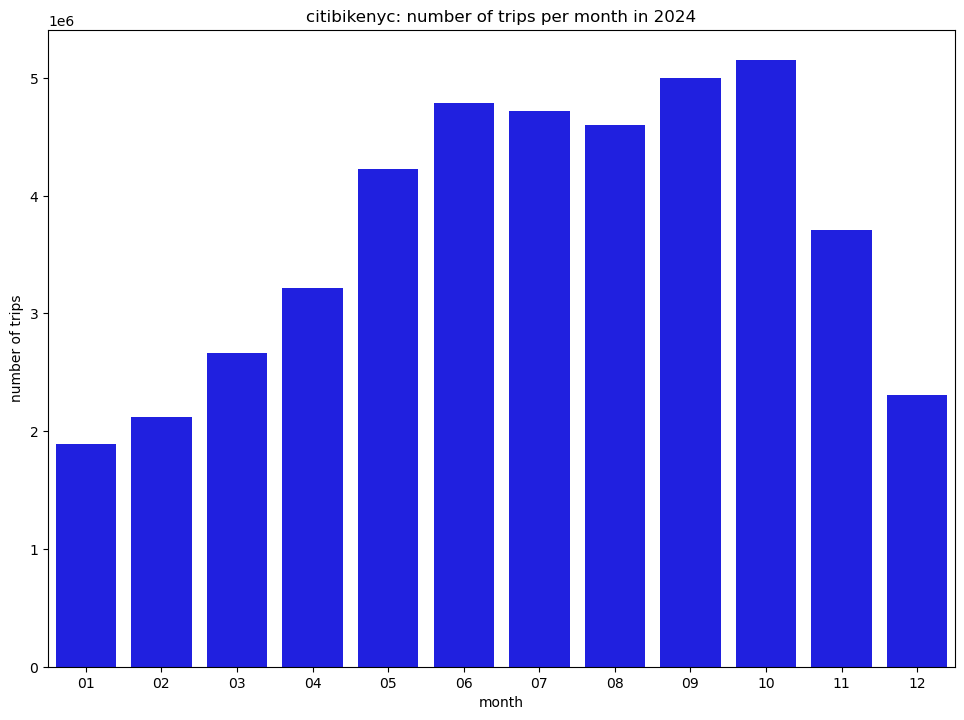

In [4]:
# plot
result_map_extended = {}
result_map_extended[year] = result_map
df_bike_trips_year = pd.DataFrame.from_dict(result_map_extended)
df_bike_trips_year["month"] = df_bike_trips_year.index
df_bike_trips_year = df_bike_trips_year.rename(columns={year: 'number of trips'})

rcParams['figure.figsize'] = 11.7,8.27

sns.barplot(data = df_bike_trips_year, x = 'month', y = 'number of trips', color='b').set_title('citibikenyc: number of trips per month in ' + str(year))

### all year stats

In [5]:
# year summary
min_usage = 0

n_total, df_coords_total = analysis_functions.analysis_summary_year(result_map, stations_analysis_list)
print(n_total)
df_coords_total

#restrict to minimal number of usage:
df_coords_total_min_usage = df_coords_total[df_coords_total["usage"] > min_usage]
#restrict to reasonable bounds for plotting
df_coords_total_min_usage = df_coords_total_min_usage[(df_coords_total_min_usage['longitude'] != 0) & (df_coords_total_min_usage['longitude'] < -73.8)]
df_coords_total_min_usage

44399608


,longitude,latitude,usage
W 21 St & 6 Ave,-73.994156,40.741740,327581
8 Ave & W 31 St,-73.994685,40.750585,282696
University Pl & E 14 St,-73.992085,40.734814,282639
West St & Chambers St,-74.013221,40.717548,273373
Broadway & W 58 St,-73.981693,40.766953,270804
...,...,...,...
Grant Ave & MLK Dr,-74.080843,40.709198,3
Bergen Ave & Stegman St,-74.086701,40.706575,3
Glenwood Ave,-73.931368,40.709825,2
Ichan Stadium Plaza,-73.923956,40.793367,1


,longitude,latitude,usage
W 21 St & 6 Ave,-73.994156,40.741740,327581
8 Ave & W 31 St,-73.994685,40.750585,282696
University Pl & E 14 St,-73.992085,40.734814,282639
West St & Chambers St,-74.013221,40.717548,273373
Broadway & W 58 St,-73.981693,40.766953,270804
...,...,...,...
Grant Ave & MLK Dr,-74.080843,40.709198,3
Bergen Ave & Stegman St,-74.086701,40.706575,3
Glenwood Ave,-73.931368,40.709825,2
Ichan Stadium Plaza,-73.923956,40.793367,1


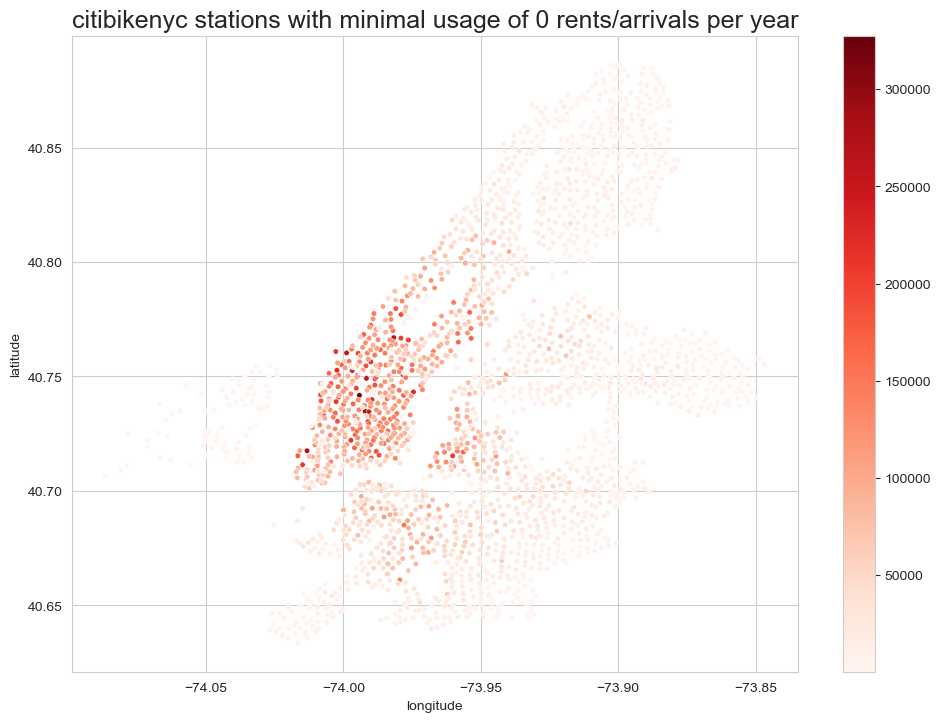

In [6]:
sns.set_style("whitegrid")
norm = plt.Normalize(df_coords_total_min_usage['usage'].min(), df_coords_total_min_usage['usage'].max())
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])

fig, ax = plt.subplots()

fig = sns.scatterplot(data=df_coords_total_min_usage, x="longitude", y="latitude", s=15, hue='usage', palette='Reds')
fig.set_title("citibikenyc stations with minimal usage of " + str(min_usage) + " rents/arrivals per year", size=18)

# Remove the legend and add a colorbar
fig.get_legend().remove()
fig.figure.colorbar(sm, ax=ax)
df_coords_total_min_usage

In [7]:
df_geocode_all_stations = pd.read_csv('intermediate_results/df_geocode_all_stations.csv', index_col=0)
df_geocode_all_stations = df_geocode_all_stations[df_geocode_all_stations.columns.intersection(['neighbourhood', 'borough', 'city'])]

# annotate generated data with neighbourhood and borough
df_coords_total_geo = df_coords_total.join(df_geocode_all_stations)
df_coords_total_geo

,longitude,latitude,usage,neighbourhood,borough,city
W 21 St & 6 Ave,-73.994156,40.741740,327581,Chelsea,Manhattan,City of New York
8 Ave & W 31 St,-73.994685,40.750585,282696,Chelsea,Manhattan,City of New York
University Pl & E 14 St,-73.992085,40.734814,282639,Union Square,Manhattan,City of New York
West St & Chambers St,-74.013221,40.717548,273373,Tribeca,Manhattan,City of New York
Broadway & W 58 St,-73.981693,40.766953,270804,Manhattan Community Board 5,Manhattan,City of New York
...,...,...,...,...,...,...
Grant Ave & MLK Dr,-74.080843,40.709198,3,NaN,NaN,Jersey City
Bergen Ave & Stegman St,-74.086701,40.706575,3,NaN,NaN,Jersey City
Glenwood Ave,-73.931368,40.709825,2,NaN,Brooklyn,City of New York
Ichan Stadium Plaza,-73.923956,40.793367,1,Manhattan Community Board 11,Manhattan,City of New York


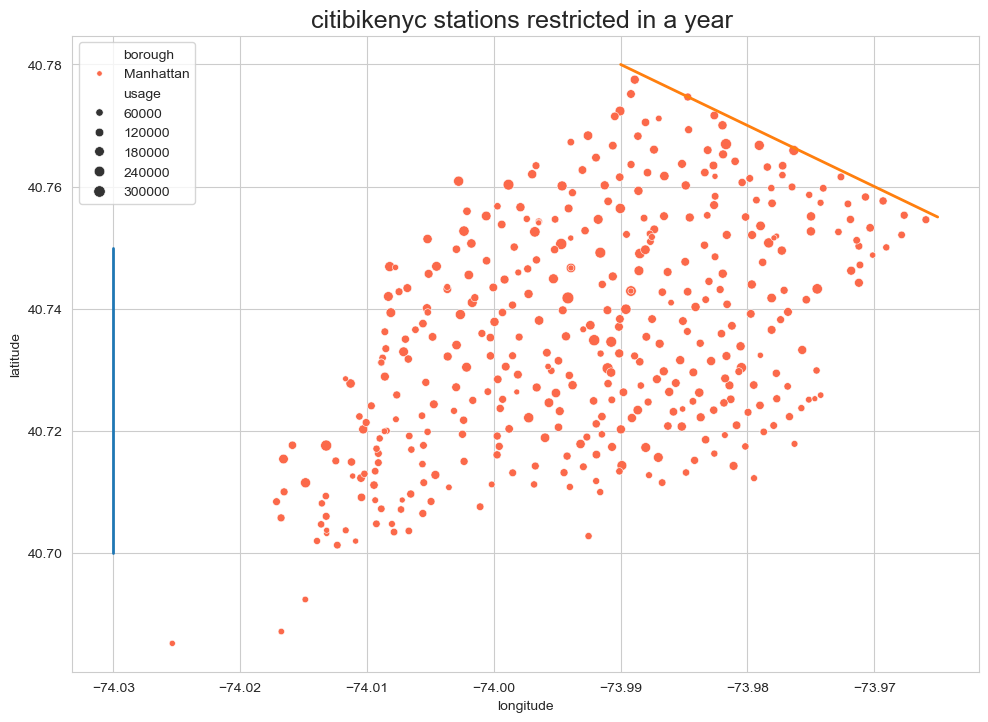

In [8]:
# also restrict citibike data to core region only
# define core region as Manhattan region that is covered by first stations in 2013
# basically Manhattan below Central Park (use Manhattan annotation from geocode AND a linear discrimination lines below central park),
# see notebook 04_reverse_geocode
# and count trip as within region, when start/end of trip is within this region

# determine for each year which stations are in this region
df_coords_total_geo_core = df_coords_total_geo[df_coords_total_geo['borough'] == 'Manhattan']
df_coords_total_geo_core = df_coords_total_geo_core[(df_coords_total_geo_core['latitude'] < (((df_coords_total_geo_core['longitude'] + 73.965)*((40.755 - 40.78)/(-73.965 + 73.99)) ) + 40.755)) & (df_coords_total_geo_core['longitude'] > -74.03)]


#check by plotting
sns.set_style("whitegrid")

fig, ax = plt.subplots()

fig = sns.scatterplot(data=df_coords_total_geo_core, x="longitude", y="latitude", s=15, size='usage', hue='borough', palette='Reds')
fig.set_title("citibikenyc stations restricted in a year ", size=18)

plt.plot([-74.03, -74.03], [40.7, 40.75], linewidth=2)
plt.plot([-73.965, -73.99], [40.755, 40.78], linewidth=2)

#okay


In [9]:
## then count only on those stations for each year
test_table_bikes = pd.read_csv("Data/2020-citibike-tripdata/202001-citibike-tripdata/202001-citibike-tripdata_1.csv")
test_table_bikes


C:\Users\tzach\AppData\Local\Temp\ipykernel_21588\2397066880.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  test_table_bikes = pd.read_csv("Data/2020-citibike-tripdata/202001-citibike-tripdata/202001-citibike-tripdata_1.csv")


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,7FB44ACE772F2B5E,classic_bike,2020-01-16 11:29:00.511,2020-01-16 11:38:38.211,E 47 St & Park Ave,6584.12,5 Ave & E 63 St,6904.06,40.755103,-73.974987,40.766368,-73.971518,member
1,514091422D32E0D4,classic_bike,2020-01-15 12:49:13.094,2020-01-15 13:23:30.078,Carmine St & 6 Ave,5763.03,Mott St & Prince St,5561.04,40.730386,-74.002150,40.723180,-73.994800,member
2,C094CBA14014648D,classic_bike,2020-01-02 08:54:03.681,2020-01-02 09:05:19.023,Carmine St & 6 Ave,5763.03,Allen St & Rivington St,5414.06,40.730386,-74.002150,40.720196,-73.989978,member
3,6675D4453C4DBFE4,classic_bike,2020-01-24 12:58:28.499,2020-01-24 13:08:07.169,Carmine St & 6 Ave,5763.03,Allen St & Rivington St,5414.06,40.730386,-74.002150,40.720196,-73.989978,member
4,FE65CE25E01D48B7,classic_bike,2020-01-16 13:19:43.325,2020-01-16 13:29:40.861,Carmine St & 6 Ave,5763.03,Allen St & Rivington St,5414.06,40.730386,-74.002150,40.720196,-73.989978,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,FDFAA91D86E2059D,classic_bike,2020-01-27 09:11:00.568,2020-01-27 09:16:09.028,Old Fulton St,4903.08,Clark St & Henry St,4789.03,40.702772,-73.993836,40.697601,-73.993446,member
999996,EA661DCFA4C66718,classic_bike,2020-01-15 08:50:14.335,2020-01-15 08:55:03.986,Old Fulton St,4903.08,Clark St & Henry St,4789.03,40.702772,-73.993836,40.697601,-73.993446,member
999997,47B320DB0D14AFCB,classic_bike,2020-01-30 09:29:08.533,2020-01-30 09:33:45.800,Old Fulton St,4903.08,Clark St & Henry St,4789.03,40.702772,-73.993836,40.697601,-73.993446,member
999998,BBA56A71525EE91A,classic_bike,2020-01-16 09:19:26.870,2020-01-16 09:24:41.594,Old Fulton St,4903.08,Clark St & Henry St,4789.03,40.702772,-73.993836,40.697601,-73.993446,member


In [10]:
# check restriction to subset of stations in df_coords_total_geo_core data frame
test_table_bikes_restricted = test_table_bikes[(test_table_bikes['start_station_name'].isin(df_coords_total_geo_core.index)) | (test_table_bikes['end_station_name'].isin(df_coords_total_geo_core.index))]
#test_table_bikes_restricted = (test_table_bikes['start_station_name'].isin(df_coords_total_geo_core.index)) | (test_table_bikes['end_station_name'].isin(df_coords_total_geo_core.index))
#test_table_bikes_restricted = (test_table_bikes['start_station_name'].isin(['E 1 St & 1 Ave'])) | (test_table_bikes['end_station_name'].isin(['E 1 St & 1 Ave']))
test_table_bikes_restricted

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,7FB44ACE772F2B5E,classic_bike,2020-01-16 11:29:00.511,2020-01-16 11:38:38.211,E 47 St & Park Ave,6584.12,5 Ave & E 63 St,6904.06,40.755103,-73.974987,40.766368,-73.971518,member
1,514091422D32E0D4,classic_bike,2020-01-15 12:49:13.094,2020-01-15 13:23:30.078,Carmine St & 6 Ave,5763.03,Mott St & Prince St,5561.04,40.730386,-74.002150,40.723180,-73.994800,member
2,C094CBA14014648D,classic_bike,2020-01-02 08:54:03.681,2020-01-02 09:05:19.023,Carmine St & 6 Ave,5763.03,Allen St & Rivington St,5414.06,40.730386,-74.002150,40.720196,-73.989978,member
3,6675D4453C4DBFE4,classic_bike,2020-01-24 12:58:28.499,2020-01-24 13:08:07.169,Carmine St & 6 Ave,5763.03,Allen St & Rivington St,5414.06,40.730386,-74.002150,40.720196,-73.989978,member
4,FE65CE25E01D48B7,classic_bike,2020-01-16 13:19:43.325,2020-01-16 13:29:40.861,Carmine St & 6 Ave,5763.03,Allen St & Rivington St,5414.06,40.730386,-74.002150,40.720196,-73.989978,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999980,A96ADB925C34B237,classic_bike,2020-01-30 17:57:38.936,2020-01-30 18:06:07.033,Mercer St & Bleecker St,5679.05,W 25 St & 6 Ave,6215.04,40.727064,-73.996621,40.743954,-73.991449,member
999984,DC91C6F9CEBA4AB2,classic_bike,2020-01-16 14:19:59.424,2020-01-16 14:25:06.870,E 17 St & Broadway,5980.07,W 25 St & 6 Ave,6215.04,40.737050,-73.990093,40.743954,-73.991449,member
999985,DE07B03450C4690D,classic_bike,2020-01-16 13:34:54.411,2020-01-16 13:41:56.694,University Pl & E 14 St,5905.14,W 18 St & 9 Ave,6190.03,40.734814,-73.992085,40.743534,-74.003676,member
999986,6A4DD3357AA203B9,classic_bike,2020-01-14 12:27:25.279,2020-01-14 12:38:44.442,Broadway & W 60 St,6948.11,W 46 St & 11 Ave,6795.01,40.769155,-73.981918,40.763414,-73.996674,member


In [11]:
df_coords_total_geo_core

,longitude,latitude,usage,neighbourhood,borough,city
W 21 St & 6 Ave,-73.994156,40.741740,327581,Chelsea,Manhattan,City of New York
8 Ave & W 31 St,-73.994685,40.750585,282696,Chelsea,Manhattan,City of New York
University Pl & E 14 St,-73.992085,40.734814,282639,Union Square,Manhattan,City of New York
West St & Chambers St,-74.013221,40.717548,273373,Tribeca,Manhattan,City of New York
Broadway & W 58 St,-73.981693,40.766953,270804,Manhattan Community Board 5,Manhattan,City of New York
...,...,...,...,...,...,...
Bike Mechanics at Riis Room A,-73.974686,40.725226,33,Manhattan Community Board 3,Manhattan,City of New York
Lab - NYC - M,-73.996466,40.754180,14,Hudson Yards,Manhattan,City of New York
Lab - NYC,-73.996466,40.754040,12,Hudson Yards,Manhattan,City of New York
Fairmount Ave,-73.998192,40.726329,8,University Village,Manhattan,City of New York


In [12]:
df_coords_total_geo_core.loc[['University Pl & E 14 St']]

,longitude,latitude,usage,neighbourhood,borough,city
University Pl & E 14 St,-73.992085,40.734814,282639,Union Square,Manhattan,City of New York


In [13]:
n_total_core, df_coords_total_core = analysis_functions.analysis_summary_year(result_map_core, stations_analysis_list_core)
print(n_total_core)
df_coords_total_core

#restrict to minimal number of usage:
df_coords_total_min_usage_core = df_coords_total_core[df_coords_total_core["usage"] > min_usage]
#restrict to reasonable bounds for plotting
df_coords_total_min_usage_core = df_coords_total_min_usage_core[(df_coords_total_min_usage_core['longitude'] != 0) & (df_coords_total_min_usage_core['longitude'] < -73.8)]
df_coords_total_min_usage_core

24222053


,longitude,latitude,usage
W 21 St & 6 Ave,-73.994156,40.741740,327581
8 Ave & W 31 St,-73.994685,40.750585,282696
University Pl & E 14 St,-73.992085,40.734814,282639
West St & Chambers St,-74.013221,40.717548,273373
Broadway & W 58 St,-73.981693,40.766953,270804
...,...,...,...
Bike Mechanics at Riis Room A,-73.974686,40.725226,33
Lab - NYC - M,-73.996466,40.754180,14
Lab - NYC,-73.996466,40.754040,12
Pillar Broadway & W 25 St,-73.989190,40.742870,6


,longitude,latitude,usage
W 21 St & 6 Ave,-73.994156,40.741740,327581
8 Ave & W 31 St,-73.994685,40.750585,282696
University Pl & E 14 St,-73.992085,40.734814,282639
West St & Chambers St,-74.013221,40.717548,273373
Broadway & W 58 St,-73.981693,40.766953,270804
...,...,...,...
Bike Mechanics at Riis Room A,-73.974686,40.725226,33
Lab - NYC - M,-73.996466,40.754180,14
Lab - NYC,-73.996466,40.754040,12
Pillar Broadway & W 25 St,-73.989190,40.742870,6


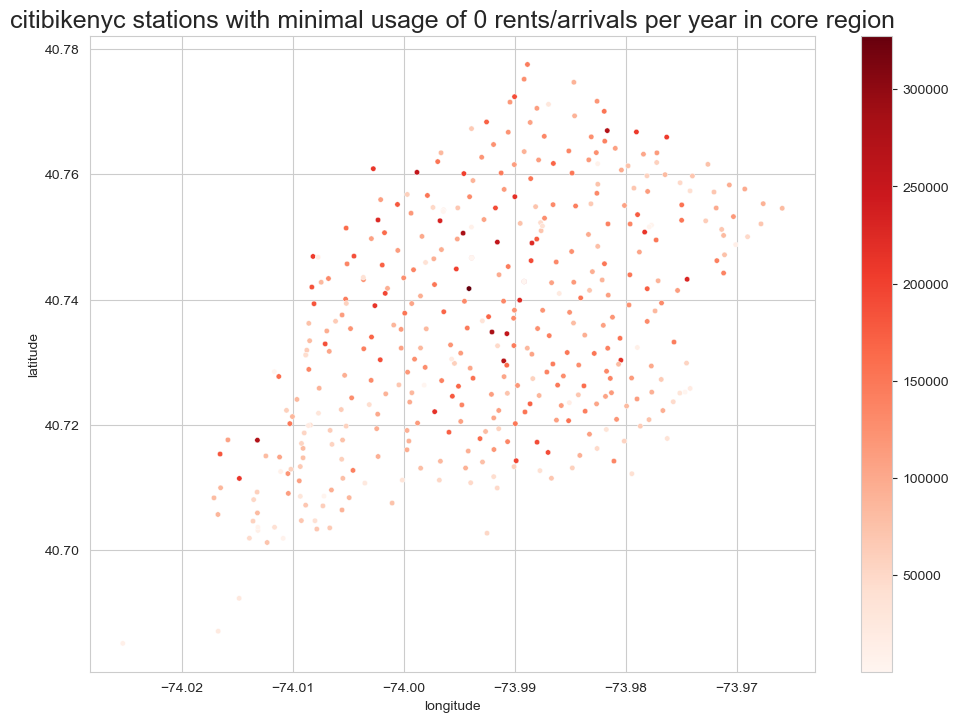

In [14]:
sns.set_style("whitegrid")
norm = plt.Normalize(df_coords_total_min_usage_core['usage'].min(), df_coords_total_min_usage_core['usage'].max())
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])

fig, ax = plt.subplots()

fig = sns.scatterplot(data=df_coords_total_min_usage_core, x="longitude", y="latitude", s=15, hue='usage', palette='Reds')
fig.set_title("citibikenyc stations with minimal usage of " + str(min_usage) + " rents/arrivals per year in core region", size=18)

# Remove the legend and add a colorbar
fig.get_legend().remove()
fig.figure.colorbar(sm, ax=ax)
df_coords_total_min_usage_core

## NYC accidents per year

### monthly intervalls

In [15]:
#Einlesen der Unfall Daten von NYC
table_accidents = pd.read_csv("Data/Motor_Vehicle_Collisions_-_Crashes_20250319.csv")

table_accidents

C:\Users\tzach\AppData\Local\Temp\ipykernel_21588\1767602452.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  table_accidents = pd.read_csv("Data/Motor_Vehicle_Collisions_-_Crashes_20250319.csv")


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162654,03/15/2025,0:00,MANHATTAN,10011.0,40.737858,-73.996704,"(40.737858, -73.996704)",NaN,NaN,541 AVENUE OF THE AMERICAS,...,Unspecified,NaN,NaN,NaN,4799150,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2162655,03/15/2025,14:08,NaN,NaN,40.623123,-74.167595,"(40.623123, -74.167595)",LISK AVE,SOUTH AVE,NaN,...,Unspecified,NaN,NaN,NaN,4799203,Taxi,Pick-up Truck,NaN,NaN,NaN
2162656,03/15/2025,10:09,NaN,NaN,40.787760,-73.791370,"(40.78776, -73.79137)",CROSS ISLAND PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4798984,Sedan,NaN,NaN,NaN,NaN
2162657,03/15/2025,17:30,QUEENS,11373.0,40.746740,-73.883640,"(40.74674, -73.88364)",NaN,NaN,40-31 82 ST,...,Unspecified,NaN,NaN,NaN,4799434,Sedan,Sedan,NaN,NaN,NaN


In [16]:
# restrict to year of interest
table_accidents["CRASH DATE"]= pd.to_datetime(table_accidents["CRASH DATE"])

table_accidents_year = table_accidents[table_accidents["CRASH DATE"].dt.year == year]
table_accidents_year

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1230,2024-09-13,14:20,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Failure to Yield Right-of-Way,NaN,NaN,NaN,4761583,Sedan,Pick-up Truck,NaN,NaN,NaN
1925,2024-10-05,12:40,NaN,NaN,40.642540,-73.876520,"(40.64254, -73.87652)",BELT PARKWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4761266,Bike,E-Bike,NaN,NaN,NaN
2991,2024-10-05,13:43,NaN,NaN,NaN,NaN,NaN,MENAHAN STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4761112,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3797,2024-10-04,6:05,NaN,NaN,NaN,NaN,NaN,WESTCHESTER SQUARE,NaN,NaN,...,NaN,NaN,NaN,NaN,4761546,Sedan,NaN,NaN,NaN,NaN
4722,2024-09-21,1:32,NaN,NaN,40.747974,-73.759990,"(40.747974, -73.75999)",LONG ISLAND EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4757494,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161591,2024-11-23,1:18,BROOKLYN,11207.0,40.688744,-73.908745,"(40.688744, -73.908745)",CENTRAL AVE,SCHAEFER ST,NaN,...,Unspecified,NaN,NaN,NaN,4798519,Sedan,NaN,NaN,NaN,NaN
2161697,2024-10-31,1:25,BROOKLYN,11207.0,40.687080,-73.913895,"(40.68708, -73.913895)",BUSHWICK AVE,HALSEY ST,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4798441,Moped,NaN,NaN,NaN,NaN
2161860,2024-12-02,10:12,MANHATTAN,10018.0,40.752853,-73.992980,"(40.752853, -73.99298)",8 AVE,W 35 ST,NaN,...,NaN,NaN,NaN,NaN,4798999,NaN,NaN,NaN,NaN,NaN
2161893,2024-12-22,19:15,BROOKLYN,11237.0,40.698536,-73.917870,"(40.698536, -73.91787)",BLEECKER ST,KNICKERBOCKER AVE,NaN,...,Unspecified,NaN,NaN,NaN,4798545,Bike,NaN,NaN,NaN,NaN


In [17]:
sum = 0
results_accidents = {}
for month in range(1,13):
    print("month: "+ str(month))
    table_accidents_month = table_accidents_year[table_accidents_year["CRASH DATE"].dt.month == month]
    sum = sum + len(table_accidents_month)
    print("number of accidents: " + str(len(table_accidents_month)))
    
    if len(results_accidents.keys()) == 0:
        results_accidents["NUMBER OF PERSONS INJURED"] = {}
        results_accidents["NUMBER OF PERSONS KILLED"] = {}
        results_accidents["NUMBER OF PEDESTRIANS INJURED"] = {}
        results_accidents["NUMBER OF PEDESTRIANS KILLED"] = {}
        results_accidents["NUMBER OF CYCLIST INJURED"] = {}
        results_accidents["NUMBER OF CYCLIST KILLED"] = {}
        results_accidents["NUMBER OF MOTORIST INJURED"] = {}
        results_accidents["NUMBER OF MOTORIST KILLED"] = {}
    
    results_accidents["NUMBER OF PERSONS INJURED"][month] = table_accidents_month["NUMBER OF PERSONS INJURED"].sum(skipna = True)
    results_accidents["NUMBER OF PERSONS KILLED"][month] = table_accidents_month["NUMBER OF PERSONS KILLED"].sum(skipna = True)
    results_accidents["NUMBER OF PEDESTRIANS INJURED"][month] = table_accidents_month["NUMBER OF PEDESTRIANS INJURED"].sum(skipna = True)
    results_accidents["NUMBER OF PEDESTRIANS KILLED"][month] = table_accidents_month["NUMBER OF PEDESTRIANS KILLED"].sum(skipna = True)
    results_accidents["NUMBER OF CYCLIST INJURED"][month] = table_accidents_month["NUMBER OF CYCLIST INJURED"].sum(skipna = True)
    results_accidents["NUMBER OF CYCLIST KILLED"][month] = table_accidents_month["NUMBER OF CYCLIST KILLED"].sum(skipna = True)
    results_accidents["NUMBER OF MOTORIST INJURED"][month] = table_accidents_month["NUMBER OF MOTORIST INJURED"].sum(skipna = True)
    results_accidents["NUMBER OF MOTORIST KILLED"][month] = table_accidents_month["NUMBER OF MOTORIST KILLED"].sum(skipna = True)
    
print(sum)
print(results_accidents)

month: 1
number of accidents: 7540
month: 2
number of accidents: 6842
month: 3
number of accidents: 7862
month: 4
number of accidents: 7159
month: 5
number of accidents: 8189
month: 6
number of accidents: 7965
month: 7
number of accidents: 7493
month: 8
number of accidents: 7639
month: 9
number of accidents: 7839
month: 10
number of accidents: 7793
month: 11
number of accidents: 7359
month: 12
number of accidents: 7602
91282
{'NUMBER OF PERSONS INJURED': {1: 4091.0, 2: 3978.0, 3: 4365.0, 4: 4031.0, 5: 4961.0, 6: 4802.0, 7: 4651.0, 8: 4873.0, 9: 4752.0, 10: 4779.0, 11: 4339.0, 12: 4383.0}, 'NUMBER OF PERSONS KILLED': {1: 21.0, 2: 22.0, 3: 27.0, 4: 17.0, 5: 21.0, 6: 30.0, 7: 19.0, 8: 32.0, 9: 16.0, 10: 22.0, 11: 22.0, 12: 17.0}, 'NUMBER OF PEDESTRIANS INJURED': {1: 897, 2: 736, 3: 783, 4: 671, 5: 760, 6: 716, 7: 636, 8: 678, 9: 783, 10: 901, 11: 988, 12: 1063}, 'NUMBER OF PEDESTRIANS KILLED': {1: 10, 2: 8, 3: 11, 4: 8, 5: 11, 6: 16, 7: 9, 8: 8, 9: 9, 10: 9, 11: 12, 12: 12}, 'NUMBER OF CY

In [18]:
df_accidents_year = pd.DataFrame.from_dict(results_accidents)
df_accidents_year["CHECK"] = df_accidents_year["NUMBER OF PEDESTRIANS INJURED"] + df_accidents_year["NUMBER OF CYCLIST INJURED"] + df_accidents_year["NUMBER OF MOTORIST INJURED"]
df_accidents_year["month"] = df_bike_trips_year.index
df_accidents_year_long = pd.melt(df_accidents_year, id_vars=['month'], value_vars=['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', \
                                                      'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', \
                                                      'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', \
                                                      'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED'], ignore_index=False).reset_index(drop=True)

df_accidents_year_long['value'] = df_accidents_year_long['value'].astype(int)
df_accidents_year_long = df_accidents_year_long.sort_values(by=['month', 'variable'])
df_accidents_year_long

,month,variable,value
48,01,NUMBER OF CYCLIST INJURED,241
60,01,NUMBER OF CYCLIST KILLED,0
72,01,NUMBER OF MOTORIST INJURED,2838
84,01,NUMBER OF MOTORIST KILLED,11
24,01,NUMBER OF PEDESTRIANS INJURED,897
...,...,...,...
95,12,NUMBER OF MOTORIST KILLED,4
35,12,NUMBER OF PEDESTRIANS INJURED,1063
47,12,NUMBER OF PEDESTRIANS KILLED,12
11,12,NUMBER OF PERSONS INJURED,4383


In [19]:
rcParams['figure.figsize'] = 15,10

Text(0.5, 1.0, 'NYC accident injuries per month in 2023')

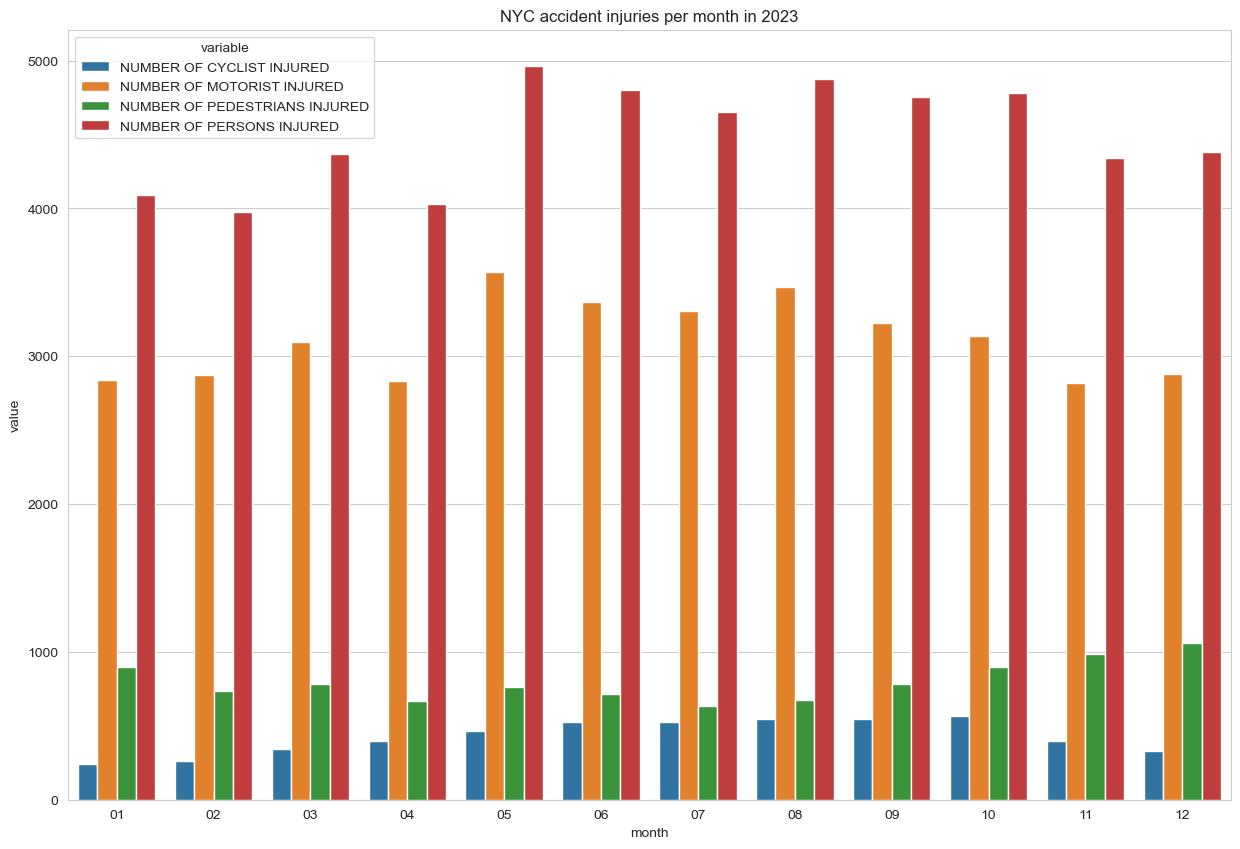

In [20]:
# injured plot
df_accidents_year_long_injured = df_accidents_year_long[df_accidents_year_long["variable"].str.contains("INJURED")]
df_accidents_year_long_injured

sns.barplot(data = df_accidents_year_long_injured, x = 'month', y='value', hue='variable').set_title('NYC accident injuries per month in 2023')


Text(0.5, 1.0, 'NYC accident deaths per month in 2023')

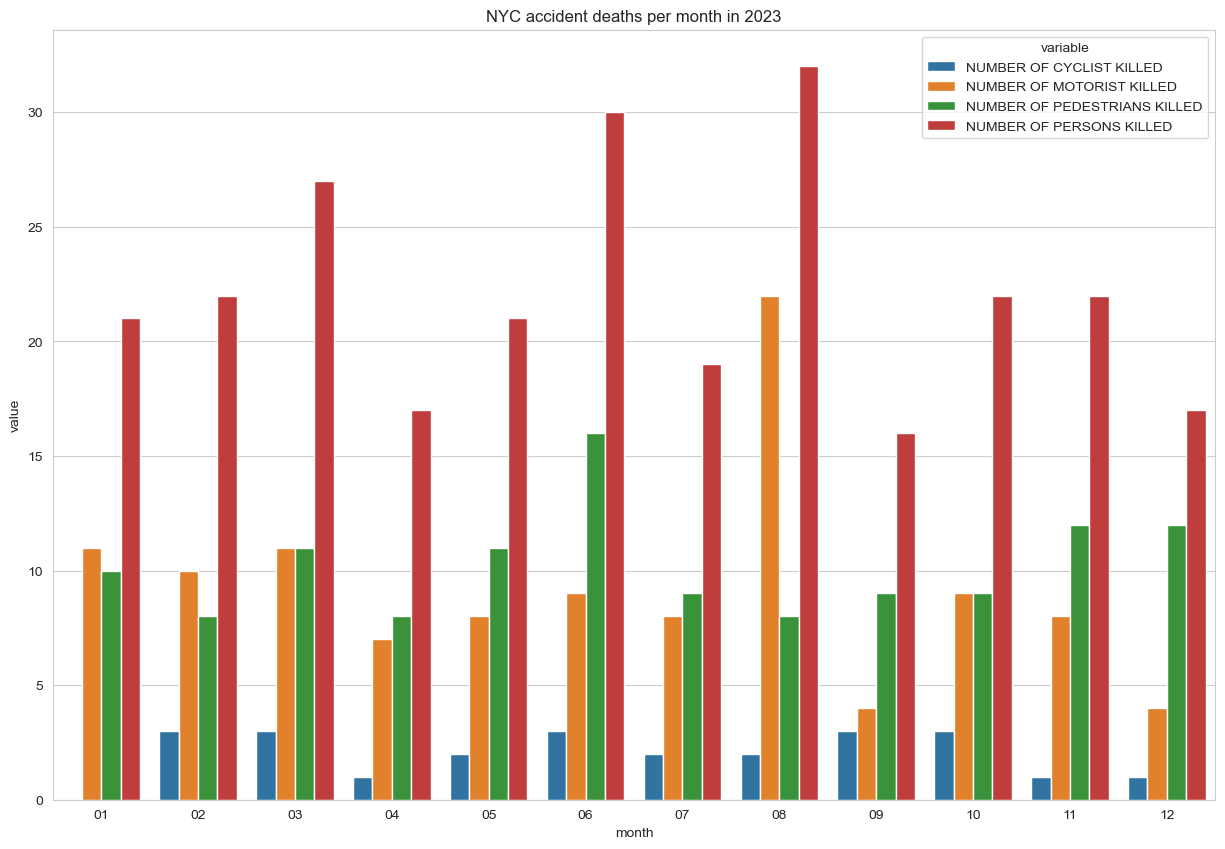

In [21]:
# killed plot
df_accidents_year_long_killed = df_accidents_year_long[df_accidents_year_long["variable"].str.contains("KILLED")]
df_accidents_year_long_killed

sns.barplot(data = df_accidents_year_long_killed, x = 'month', y='value', hue='variable').set_title('NYC accident deaths per month in 2023')


In [22]:
# cyclists only (as relevant for citibikenyc, injured and killed)
df_cyclists_injured = df_accidents_year_long_injured[(df_accidents_year_long_injured["variable"] == "NUMBER OF CYCLIST INJURED")].reset_index(drop=True)
df_cyclists_killed = df_accidents_year_long_killed[df_accidents_year_long_killed["variable"] == "NUMBER OF CYCLIST KILLED"].reset_index(drop=True)
df_cyclists = df_cyclists_killed.merge(df_cyclists_injured, on="month")
df_cyclists = df_cyclists.rename(columns={'value_x' : 'killed', 'value_y' : 'injured'})
df_cyclists

df_cyclists = pd.DataFrame(pd.melt(df_cyclists, id_vars=['month'], value_vars=['killed', 'injured']))
df_cyclists.sort_values('month', inplace = True)
df_cyclists


,month,variable,value
0,01,killed,0
12,01,injured,241
1,02,killed,3
13,02,injured,263
2,03,killed,3
14,03,injured,345
3,04,killed,1
15,04,injured,400
4,05,killed,2
16,05,injured,468


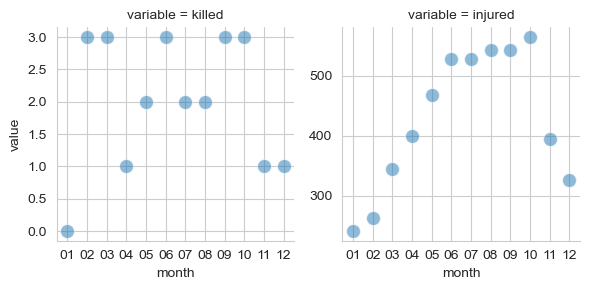

In [23]:
g = sns.FacetGrid(df_cyclists, col="variable", sharey=False)
g.map(sns.scatterplot, "month", "value", s=100, alpha=.5)


### per year

In [24]:
accidents_coords = table_accidents_year[["LATITUDE", "LONGITUDE"]]
print(len(accidents_coords))
#remove NaNs
accidents_coords_cleaned = accidents_coords.dropna()
print(len(accidents_coords_cleaned))

# also remove Lat/LONG=0 
accidents_coords_cleaned = accidents_coords_cleaned[accidents_coords_cleaned["LATITUDE"] != 0]
accidents_coords_cleaned.rename(columns={'LONGITUDE': 'longitude', 'LATITUDE': 'latitude'}, inplace = True)
accidents_coords_cleaned

91282
84184


,latitude,longitude
1925,40.642540,-73.876520
4722,40.747974,-73.759990
10589,40.651268,-73.971810
10592,40.824760,-73.893880
10775,40.825030,-73.931220
...,...,...
2161591,40.688744,-73.908745
2161697,40.687080,-73.913895
2161860,40.752853,-73.992980
2161893,40.698536,-73.917870


Text(0.5, 1.0, 'Accidents 2024')

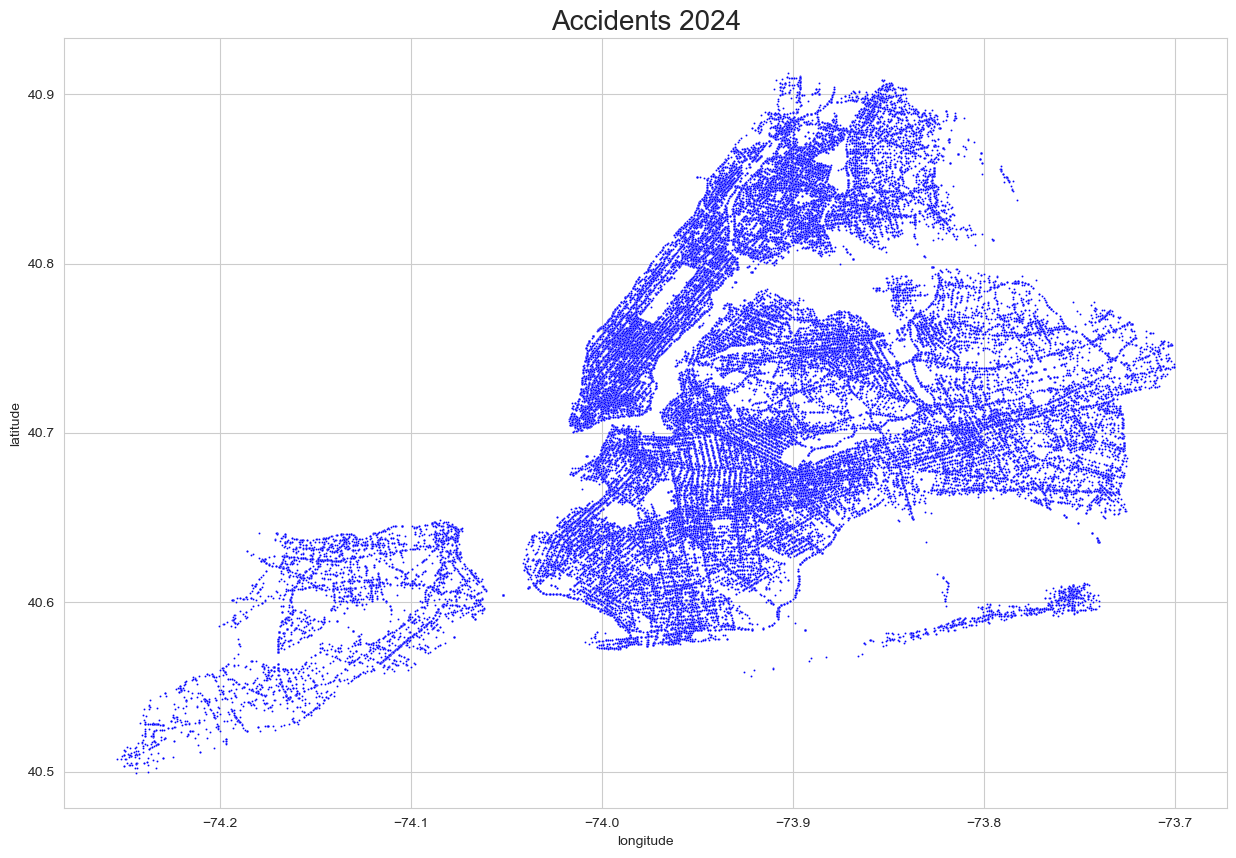

In [25]:
# make map with injuries/deaths per year

sns.set_style("whitegrid")
sns.scatterplot(data=accidents_coords_cleaned, x="longitude", y="latitude", s=2, color = 'blue').set_title("Accidents "+ str(year), size=20)


In [26]:
# only plot cyclist accidents
accidents_coords_cyclists = table_accidents_year[(table_accidents_year["NUMBER OF CYCLIST INJURED"] >0) | (table_accidents_year["NUMBER OF CYCLIST KILLED"] > 0)]
print(accidents_coords_cyclists["BOROUGH"].unique())
#accidents_coords_cyclists = accidents_coords_cyclists[(accidents_coords_cyclists["BOROUGH"] == "MANHATTAN")]# |\
#(accidents_coords_cyclists["BOROUGH"] == "BRONX") | (accidents_coords_cyclists["BOROUGH"] == "BROOKLYN") |\
#(accidents_coords_cyclists["BOROUGH"] == "QUEENS") | (accidents_coords_cyclists["BOROUGH"] == "STATEN ISLAND")]
accidents_coords_cyclists = accidents_coords_cyclists[["LATITUDE", "LONGITUDE"]]
accidents_coords_cyclists_cleaned = accidents_coords_cyclists[accidents_coords_cyclists["LATITUDE"] != 0]
accidents_coords_cyclists_cleaned.rename(columns={'LONGITUDE': 'longitude', 'LATITUDE': 'latitude'}, inplace = True)
accidents_coords_cyclists_cleaned


[nan 'BRONX' 'QUEENS' 'BROOKLYN' 'MANHATTAN' 'STATEN ISLAND']


C:\Users\tzach\AppData\Local\Temp\ipykernel_21588\1691957329.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_coords_cyclists_cleaned.rename(columns={'LONGITUDE': 'longitude', 'LATITUDE': 'latitude'}, inplace = True)


,latitude,longitude
1925,40.642540,-73.876520
10564,NaN,NaN
40007,NaN,NaN
111826,NaN,NaN
120830,NaN,NaN
...,...,...
2155556,40.872314,-73.912735
2155798,40.764057,-73.992240
2158284,40.665417,-73.965355
2158642,40.769848,-73.984314


Text(0.5, 1.0, 'Cyclist accidents 2024')

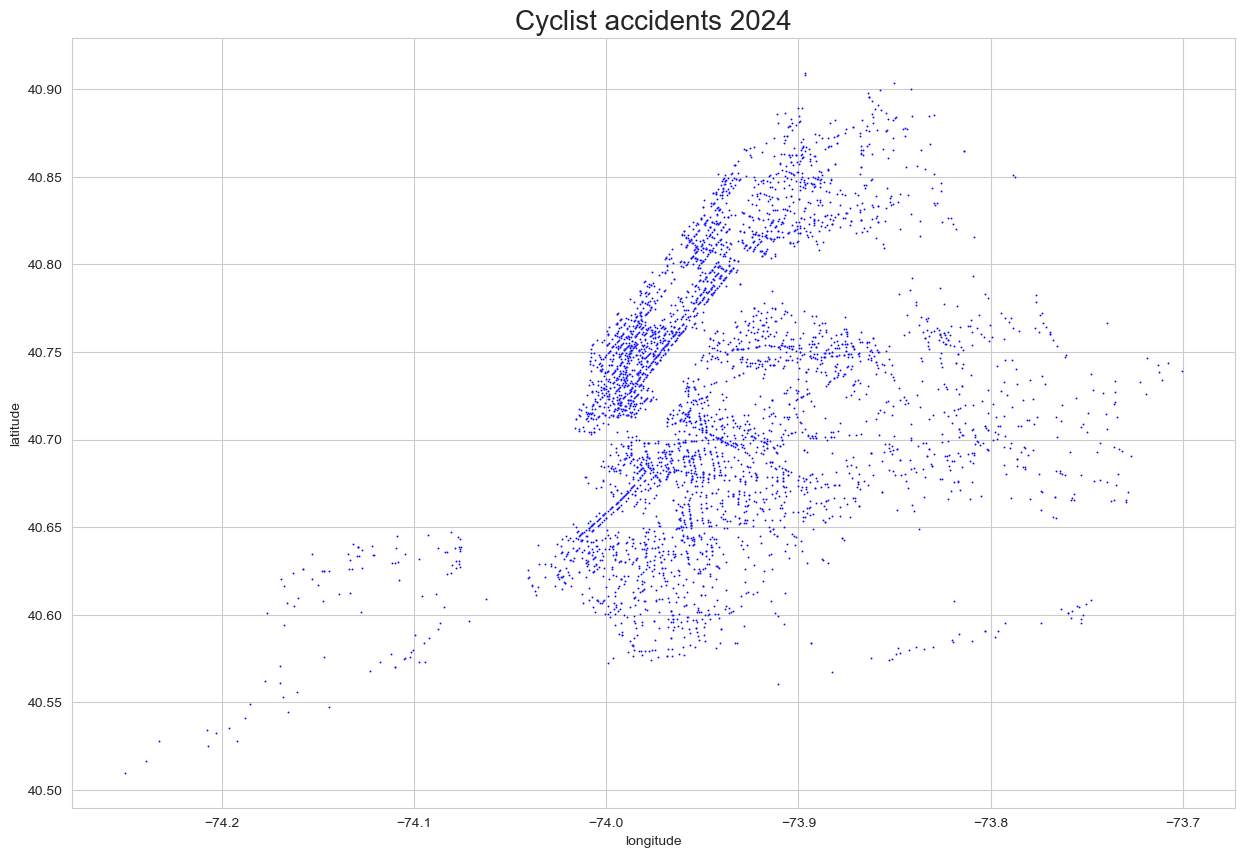

In [27]:
sns.set_style("whitegrid")
sns.scatterplot(data=accidents_coords_cyclists_cleaned, x="longitude", y="latitude", s=2, color = 'blue').set_title("Cyclist accidents "+ str(year), size=20)


In [28]:
# now restrict to areas near much used citibike stations (for rent/arrival) in core region
# go through accidents and pick
accidents_coords_cyclists["in_region"] = 0

# loop explicitly over tables as tables are not too large
count = 0
for index, row in accidents_coords_cyclists.iterrows():
    #print(row['c1'], row['c2'])
    if (count%100) == 0:
        print(count)
    count = count + 1
    close_enough = False
    for index2, row2 in df_coords_total_geo_core.iterrows():
        distance = math.sqrt(math.pow((row['LONGITUDE'] - row2['longitude']) * 85118, 2.0) + math.pow((row['LATITUDE'] - row2['latitude']) * 111120, 2.0))
        if distance < 500:
            close_enough = True 
            break
    if close_enough:
        accidents_coords_cyclists.loc[index, "in_region"] = 1

        
accidents_coords_cyclists[accidents_coords_cyclists["in_region"] == 1]

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000


,LATITUDE,LONGITUDE,in_region
192592,40.757908,-73.989300,1
209095,40.721380,-73.992660,1
217973,40.754250,-73.968990,1
217998,40.727325,-74.007324,1
220079,40.759100,-73.992140,1
...,...,...,...
2151561,40.748158,-73.970320,1
2151607,40.747883,-73.975426,1
2151650,40.717280,-73.995430,1
2155798,40.764057,-73.992240,1


Text(0.5, 1.0, 'Cyclist accidents 2024')

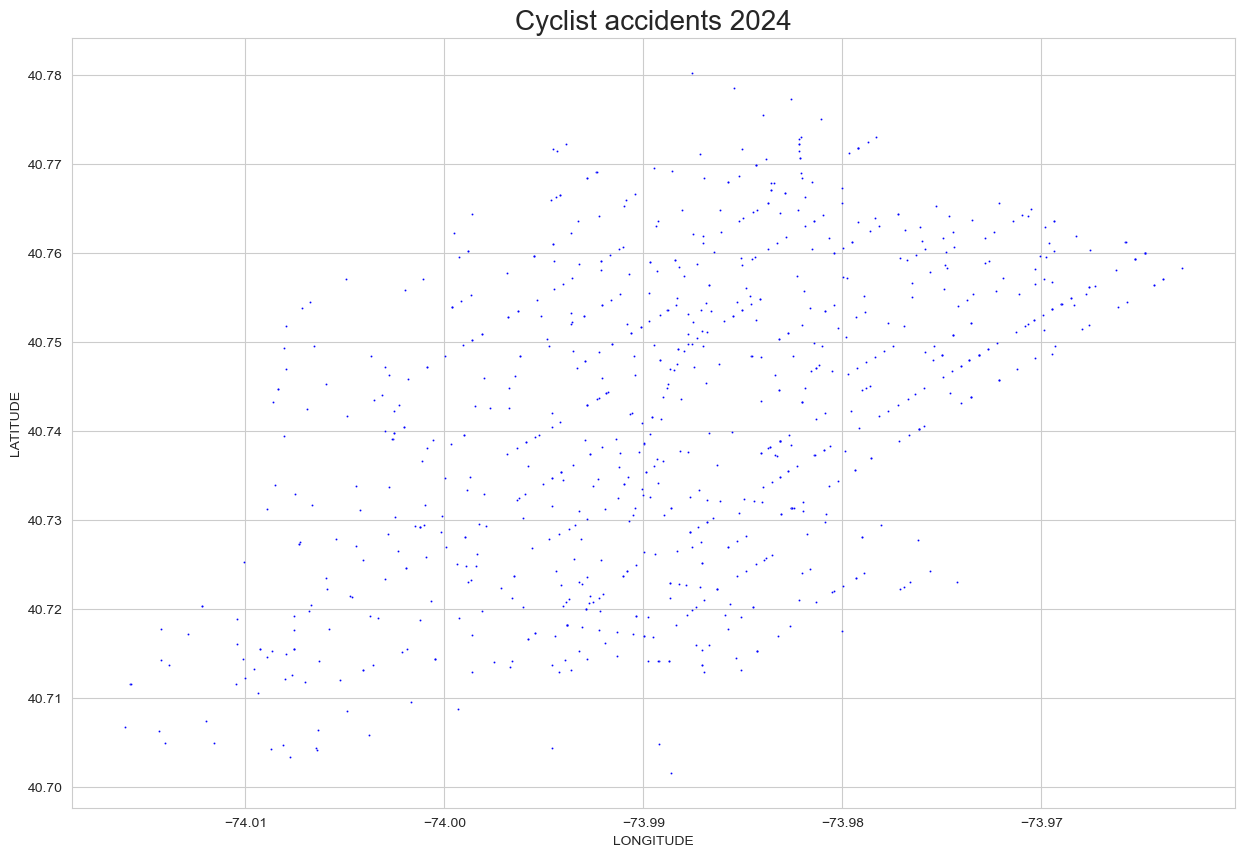

In [29]:
accidents_coords_cyclists_region = accidents_coords_cyclists[accidents_coords_cyclists["in_region"] == 1]

sns.set_style("whitegrid")
sns.scatterplot(data=accidents_coords_cyclists_region, x="LONGITUDE", y="LATITUDE", s=2, color = 'blue').set_title("Cyclist accidents "+ str(year), size=20)


In [30]:
table_accidents_year = table_accidents[table_accidents["CRASH DATE"].dt.year == year]
table_accidents_year

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1230,2024-09-13,14:20,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Failure to Yield Right-of-Way,NaN,NaN,NaN,4761583,Sedan,Pick-up Truck,NaN,NaN,NaN
1925,2024-10-05,12:40,NaN,NaN,40.642540,-73.876520,"(40.64254, -73.87652)",BELT PARKWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4761266,Bike,E-Bike,NaN,NaN,NaN
2991,2024-10-05,13:43,NaN,NaN,NaN,NaN,NaN,MENAHAN STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4761112,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3797,2024-10-04,6:05,NaN,NaN,NaN,NaN,NaN,WESTCHESTER SQUARE,NaN,NaN,...,NaN,NaN,NaN,NaN,4761546,Sedan,NaN,NaN,NaN,NaN
4722,2024-09-21,1:32,NaN,NaN,40.747974,-73.759990,"(40.747974, -73.75999)",LONG ISLAND EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4757494,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161591,2024-11-23,1:18,BROOKLYN,11207.0,40.688744,-73.908745,"(40.688744, -73.908745)",CENTRAL AVE,SCHAEFER ST,NaN,...,Unspecified,NaN,NaN,NaN,4798519,Sedan,NaN,NaN,NaN,NaN
2161697,2024-10-31,1:25,BROOKLYN,11207.0,40.687080,-73.913895,"(40.68708, -73.913895)",BUSHWICK AVE,HALSEY ST,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4798441,Moped,NaN,NaN,NaN,NaN
2161860,2024-12-02,10:12,MANHATTAN,10018.0,40.752853,-73.992980,"(40.752853, -73.99298)",8 AVE,W 35 ST,NaN,...,NaN,NaN,NaN,NaN,4798999,NaN,NaN,NaN,NaN,NaN
2161893,2024-12-22,19:15,BROOKLYN,11237.0,40.698536,-73.917870,"(40.698536, -73.91787)",BLEECKER ST,KNICKERBOCKER AVE,NaN,...,Unspecified,NaN,NaN,NaN,4798545,Bike,NaN,NaN,NaN,NaN


In [31]:
# check crash times/occurences for weekends/weekdays
table_accidents_year['CRASH DATE'] = pd.to_datetime(table_accidents_year['CRASH DATE'])
table_accidents_year['hour'] = pd.to_datetime(table_accidents_year['CRASH TIME'], format='%H:%M').dt.strftime("%H").astype(int)
table_accidents_year['day'] = table_accidents_year['CRASH DATE'].dt.weekday
table_accidents_year['workday'] = table_accidents_year['day'].isin([0, 1, 2, 3, 4]).astype(int)
table_accidents_year_workday = table_accidents_year[table_accidents_year['workday'] == 1]
table_accidents_year_weekend = table_accidents_year[table_accidents_year['workday'] == 0]

# restrict to cyclists involved
table_accidents_cyclist_year_workday = table_accidents_year_workday[(table_accidents_year_workday["NUMBER OF CYCLIST INJURED"] > 0) | (table_accidents_year_workday["NUMBER OF CYCLIST KILLED"] > 0)]
table_accidents_cyclist_year_weekend = table_accidents_year_weekend[(table_accidents_year_weekend["NUMBER OF CYCLIST INJURED"] > 0) | (table_accidents_year_weekend["NUMBER OF CYCLIST KILLED"] > 0)]

table_accidents_cyclist_year_workday[table_accidents_cyclist_year_workday['hour'] == 6]
#table_accidents_cyclist_year_weekend

C:\Users\tzach\AppData\Local\Temp\ipykernel_21588\217734965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_accidents_year['CRASH DATE'] = pd.to_datetime(table_accidents_year['CRASH DATE'])
C:\Users\tzach\AppData\Local\Temp\ipykernel_21588\217734965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_accidents_year['hour'] = pd.to_datetime(table_accidents_year['CRASH TIME'], format='%H:%M').dt.strftime("%H").astype(int)
C:\Users\tzach\AppData\Local\Temp\ipykernel_21588\217734965.py:4: Settin

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,hour,day,workday
238098,2024-02-05,6:50,NaN,NaN,40.761300,-73.809520,"(40.7613, -73.80952)",156 STREET,NaN,NaN,...,NaN,4700468,Sedan,Bike,NaN,NaN,NaN,6,0,1
278894,2024-05-09,6:02,MANHATTAN,10023.0,40.779360,-73.977370,"(40.77936, -73.97737)",COLUMBUS AVENUE,WEST 75 STREET,NaN,...,NaN,4723257,Bike,NaN,NaN,NaN,NaN,6,3,1
281692,2024-02-16,6:30,QUEENS,11101.0,40.753304,-73.912575,"(40.753304, -73.912575)",NORTHERN BOULEVARD,50 STREET,NaN,...,NaN,4704318,Bike,NaN,NaN,NaN,NaN,6,4,1
281786,2024-02-20,6:10,QUEENS,11378.0,40.718273,-73.902190,"(40.718273, -73.90219)",FRESH POND ROAD,61 STREET,NaN,...,NaN,4703948,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN,6,1,1
293616,2024-02-28,6:53,MANHATTAN,10029.0,40.793816,-73.940120,"(40.793816, -73.94012)",2 AVENUE,EAST 111 STREET,NaN,...,NaN,4705908,Sedan,Bike,NaN,NaN,NaN,6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147209,2024-12-09,6:00,QUEENS,11355.0,40.746360,-73.836044,"(40.74636, -73.836044)",MERIDIAN RD,RODMAN WALK,NaN,...,NaN,4778323,Sedan,Bike,NaN,NaN,NaN,6,0,1
2148411,2024-12-13,6:05,BRONX,10462.0,40.835636,-73.848060,"(40.835636, -73.84806)",GLOVER ST,WESTCHESTER AVE,NaN,...,NaN,4779370,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,6,4,1
2150128,2024-12-19,6:56,BRONX,10460.0,40.847080,-73.886696,"(40.84708, -73.886696)",E 180 ST,PROSPECT AVE,NaN,...,NaN,4780929,Bike,NaN,NaN,NaN,NaN,6,3,1
2150160,2024-12-18,6:25,BROOKLYN,11203.0,40.638786,-73.945370,"(40.638786, -73.94537)",NEW YORK AVE,FOSTER AVE,NaN,...,NaN,4781112,Sedan,E-Bike,NaN,NaN,NaN,6,2,1


Text(0.5, 1.0, 'Distribution of times of accidents during workdays (Monday-Friday)')

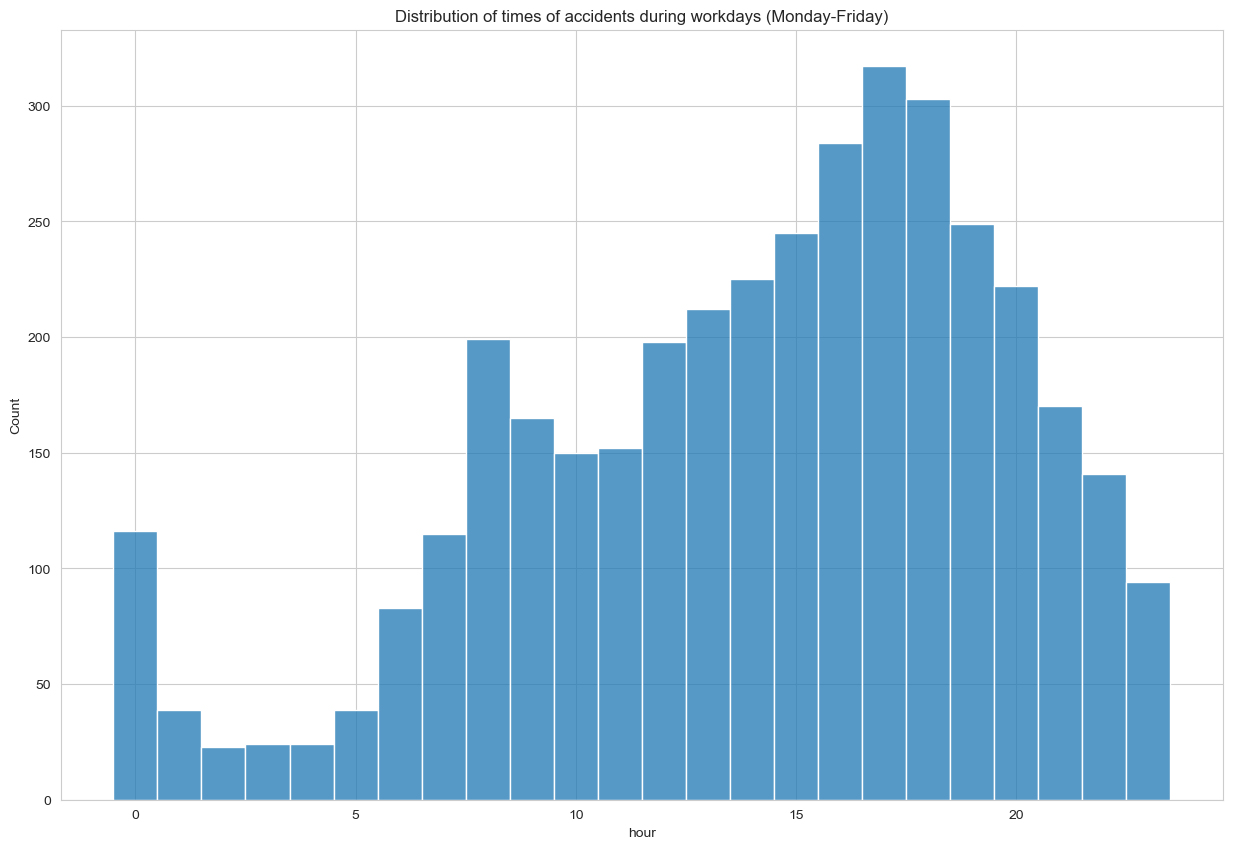

In [32]:
times_workday = table_accidents_cyclist_year_workday[['hour', 'day']]
#times_workday.sort_values('hour')
times_workday
sns.histplot(data=times_workday, x="hour", discrete=True).set_title("Distribution of times of bicycle accidents during workdays (Monday-Friday)")

Text(0.5, 1.0, 'Distribution of times of accidents during weekends (Saturday-Sunday)')

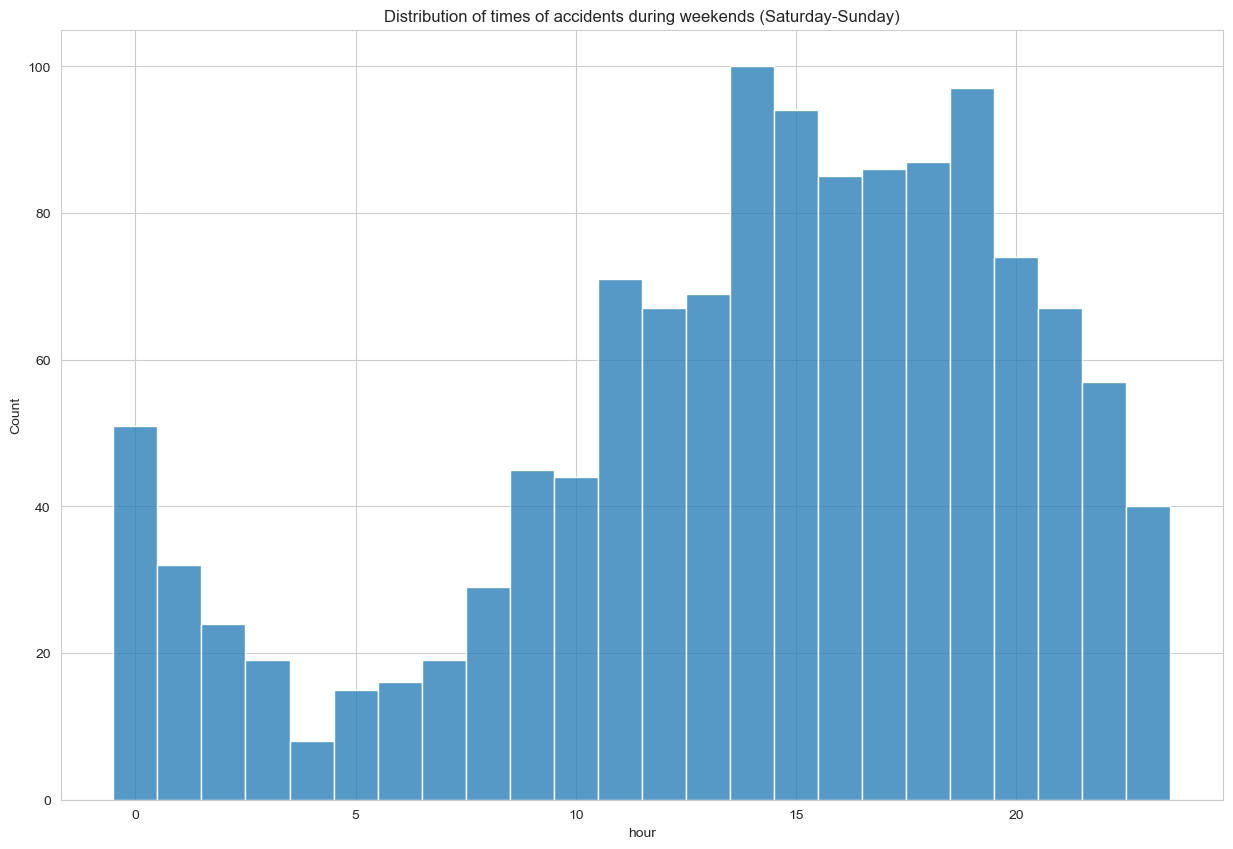

In [33]:
times_weekend = table_accidents_cyclist_year_weekend[['hour', 'day']]
#times_workday.sort_values('hour')
times_weekend
sns.histplot(data=times_weekend, x="hour", discrete=True).set_title("Distribution of times of bicycle accidents during weekends (Saturday-Sunday)")